In [2]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)


100%|██████████| 612M/612M [00:05<00:00, 111MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


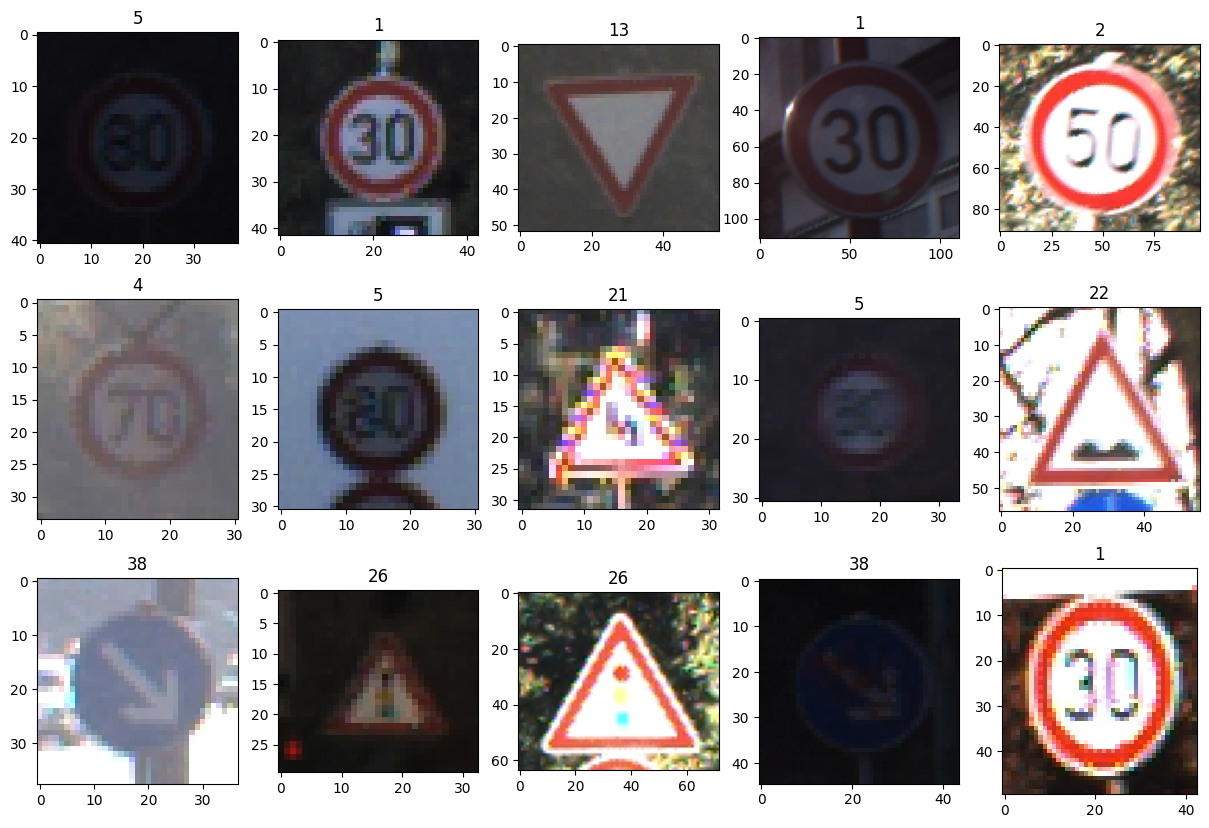

In [4]:
# Load the training labels
root = '/root/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [5]:
# Extract class identifiers
# Hint: Check the csv
ids = data['ClassId'].unique()
ids = np.sort(ids)

print(f"Class identifiers: {ids}")

Class identifiers: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


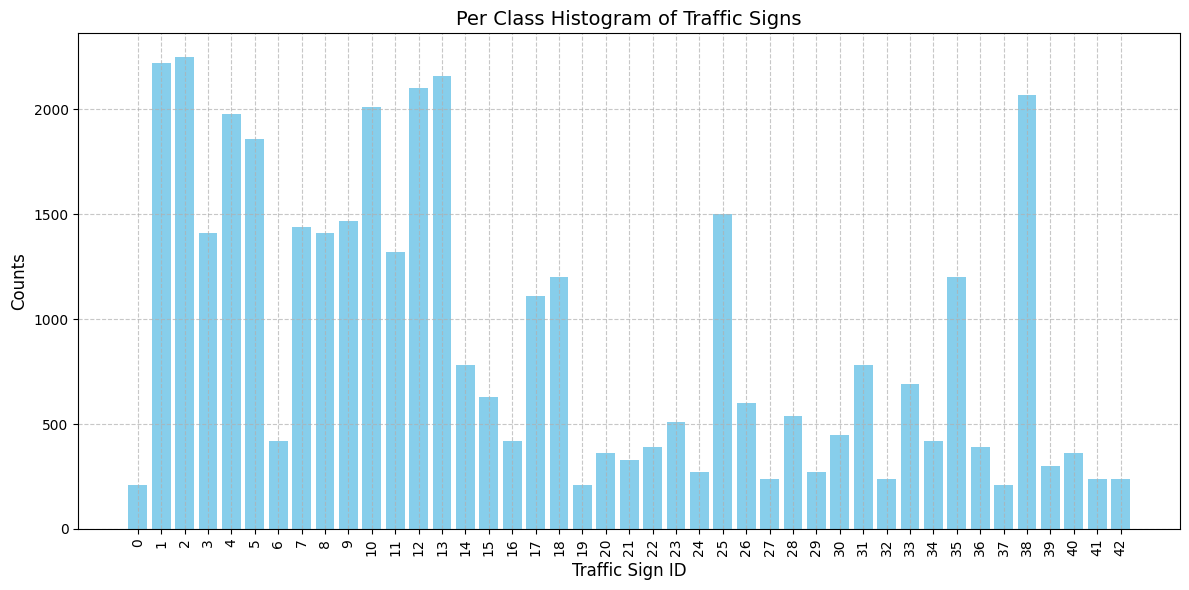

In [7]:
from collections import Counter

# Compute the per class histogram
hist = Counter(data['ClassId'])

# Histogram
plt.figure(figsize=(12, 6))
plt.bar(hist.keys(), hist.values(), color='skyblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Traffic Sign ID', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Per Class Histogram of Traffic Signs', fontsize=14)
plt.xticks(list(hist.keys()), rotation=90)
plt.tight_layout()
plt.show()


**Questions**
1. Do you consider the dataset to be balanced? If so, why? If not, why?

Набор данных является сбалансированным, если все классы имеют примерно одинаковое количество образцов.
Чтобы определить это, мы проанализировали распределение классов, используя гистограмму из предыдущего кода. Количество образцов в каждом классе значительно различается, набор данных несбалансирован.
Поскольку в некоторых классах выборок гораздо меньше или больше, чем в других, набор данных несбалансирован.

2. Are there any classes that are (significantly) over-represented or under-represeneted?

Чрезмерно представленные классы: вероятно, имеют тысячи образцов.
Недостаточно представленные классы: может иметься всего несколько образцов, что делает их склонными к плохому обобщению с помощью модели.
Для того чтоб это определить, можно использовать гистограму:

In [8]:
max_class = max(hist, key=hist.get)
min_class = min(hist, key=hist.get)
print(f"Most samples in class {max_class}: {hist[max_class]}")
print(f"Fewest samples in class {min_class}: {hist[min_class]}")


Most samples in class 2: 2250
Fewest samples in class 0: 210
